In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:08<00:00, 24.3MB/s]
100% 163M/163M [00:08<00:00, 20.4MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2181.jpg', 'with_mask_1942.jpg', 'with_mask_581.jpg', 'with_mask_1026.jpg', 'with_mask_1614.jpg']
['with_mask_2381.jpg', 'with_mask_140.jpg', 'with_mask_2643.jpg', 'with_mask_2797.jpg', 'with_mask_1421.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3324.jpg', 'without_mask_1680.jpg', 'without_mask_522.jpg', 'without_mask_893.jpg', 'without_mask_2221.jpg']
['without_mask_2420.jpg', 'without_mask_3075.jpg', 'without_mask_2735.jpg', 'without_mask_3749.jpg', 'without_mask_1667.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

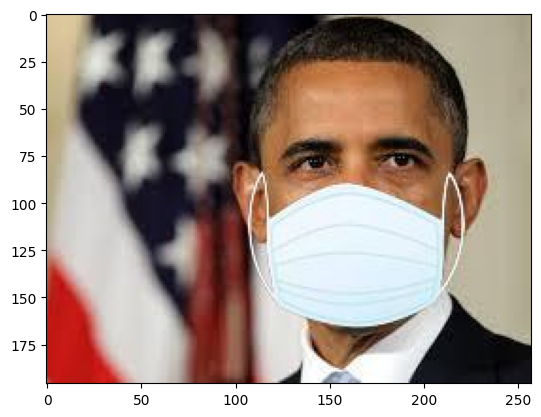

In [48]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1004.jpg')
imgplot = plt.imshow(img)
plt.show()

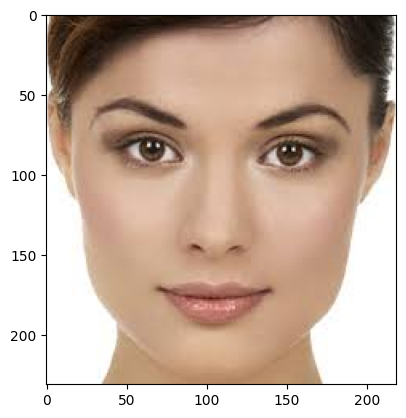

In [49]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1004.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[249, 238, 242],
        [253, 230, 218],
        [223, 180, 144],
        ...,
        [250, 250, 252],
        [249, 249, 251],
        [251, 251, 253]],

       [[235, 235, 237],
        [242, 221, 210],
        [231, 184, 153],
        ...,
        [249, 249, 251],
        [249, 249, 251],
        [247, 247, 249]],

       [[232, 225, 237],
        [239, 219, 206],
        [237, 198, 163],
        ...,
        [250, 250, 251],
        [250, 250, 251],
        [248, 248, 250]]], dtype=uint8)
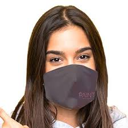

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[171, 189, 189],
        [171, 189, 189],
        [171, 189, 189],
        ...,
        [171, 189, 189],
        [171, 189, 189],
        [171, 189, 189]],

       [[171, 189, 189],
        [171, 189, 189],
        [171, 189, 189],
        ...,
        [171, 189, 189],
        [171, 189, 189],
        [171, 189, 189]],

       [[171, 189, 189],
        [171, 189, 189],
        [171, 189, 189],
        ...,
        [171, 189, 189],
        [171, 189, 189],
        [171, 189, 189]],

       ...,

       [[ 75, 109, 165],
        [ 61,  94, 153],
        [ 60,  91, 154],
        ...,
        [160, 178, 179],
        [160, 178, 179],
        [159, 178, 177]],

       [[ 61,  92, 149],
        [ 62,  91, 151],
        [ 60,  89, 150],
        ...,
        [158, 177, 176],
        [160, 176, 172],
        [158, 177, 173]],

       [[ 61,  90, 148],
        [ 62,  91, 151],
        [ 60,  89, 149],
        ...,
        [157, 177, 174],
        [160, 177, 170],
        [159, 177, 173]]], dtype=uint8)
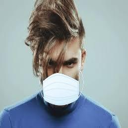

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        ...,
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647]],

       [[0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        ...,
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647]],

       [[0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        ...,
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647],
        [0.67058824, 0.74117647, 0.74117647]],

       ...,

       [[0.29411765, 0.42745098, 0.64705882],
        [0.23921569, 0.36862745, 0.6       ],
        [0.23529412, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - acc: 0.7106 - loss: 0.6828 - val_acc: 0.8727 - val_loss: 0.3066
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8773 - loss: 0.3091 - val_acc: 0.8826 - val_loss: 0.2892
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9083 - loss: 0.2381 - val_acc: 0.8893 - val_loss: 0.2354
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.9197 - loss: 0.2148 - val_acc: 0.9058 - val_loss: 0.2730
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9352 - loss: 0.1696 - val_acc: 0.9174 - val_loss: 0.2499


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9177 - loss: 0.2167
Test Accuracy = 0.9133024215698242


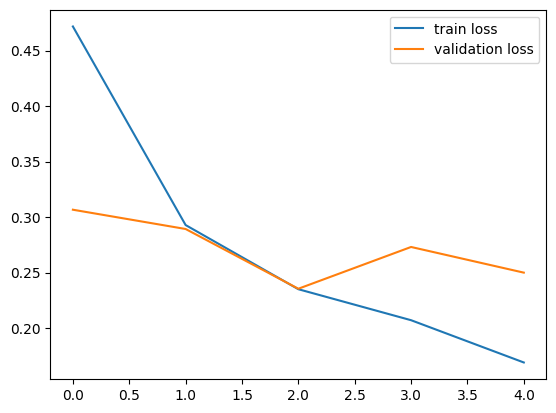

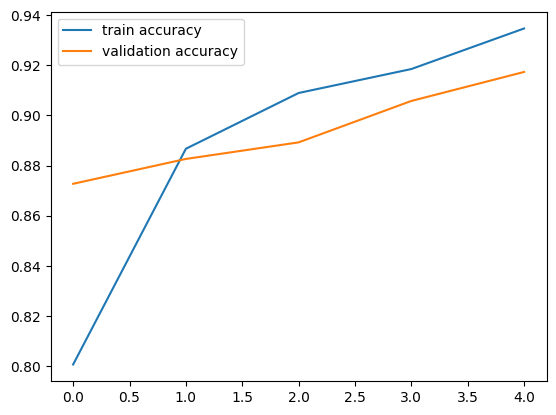

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/with_test.jfif


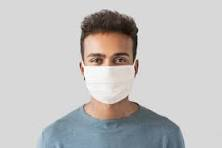

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.45023745 0.63943976]]
1
The person in the image is wearing a mask


In [53]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/without_test.jfif


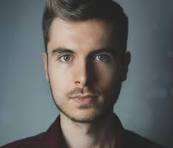

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.44534427 0.68074894]]
1
The person in the image is not wearing a mask


In [55]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is not wearing a mask')